# _Design of Experiment(DOE): ANOVA - TukeyHSD_

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns


### Generate example data

In [2]:
np.random.seed(0)
data = {
    'group': ['control'] * 100 + ['treatment1'] * 100 + ['treatment2'] * 100,
    'performance': np.random.normal(loc=50, scale=10, size=100).tolist() +
                   np.random.normal(loc=55, scale=10, size=100).tolist() +
                   np.random.normal(loc=60, scale=10, size=100).tolist()
}
df = pd.DataFrame(data)


In [3]:
# Calculate and plot effect sizes
def compute_effect_size(group1, group2):
    """Compute Cohen's d effect size."""
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((std1**2 * (n1 - 1) + std2**2 * (n2 - 1)) / (n1 + n2 - 2)))
    return (mean2 - mean1) / pooled_std


### <font color='Blue'>Perform ANOVA</font>

In [4]:
model = ols('performance ~ C(group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:")
print(anova_table)


ANOVA results:
                sum_sq     df          F        PR(>F)
C(group)   3924.976782    2.0  19.476213  1.127411e-08
Residual  29926.714014  297.0        NaN           NaN


### <font color='Blue'>Perform Tukey HSD test</font>

In [5]:
tukey = pairwise_tukeyhsd(endog=df['performance'], groups=df['group'], alpha=0.05)
print("\nTukey HSD test results:")
print(tukey)



Tukey HSD test results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj  lower   upper  reject
-----------------------------------------------------------
   control treatment1    5.222 0.0008 1.8781   8.566   True
   control treatment2   8.8096    0.0 5.4657 12.1535   True
treatment1 treatment2   3.5875 0.0321 0.2436  6.9315   True
-----------------------------------------------------------


### <font color='Blue'>Plotting</font>

#### Plot means and confidence intervals

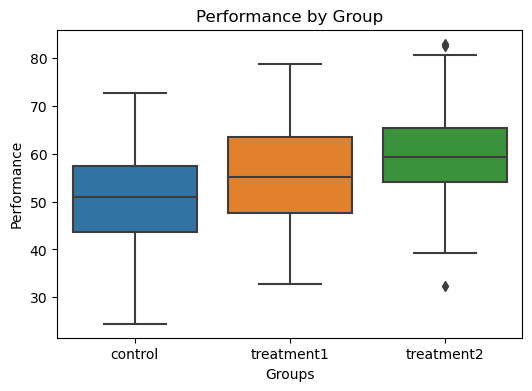

In [6]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='group', y='performance', data=df)
plt.title('Performance by Group')
plt.xlabel('Groups')
plt.ylabel('Performance')
plt.show()


#### Plot Tukey HSD results

<Figure size 600x400 with 0 Axes>

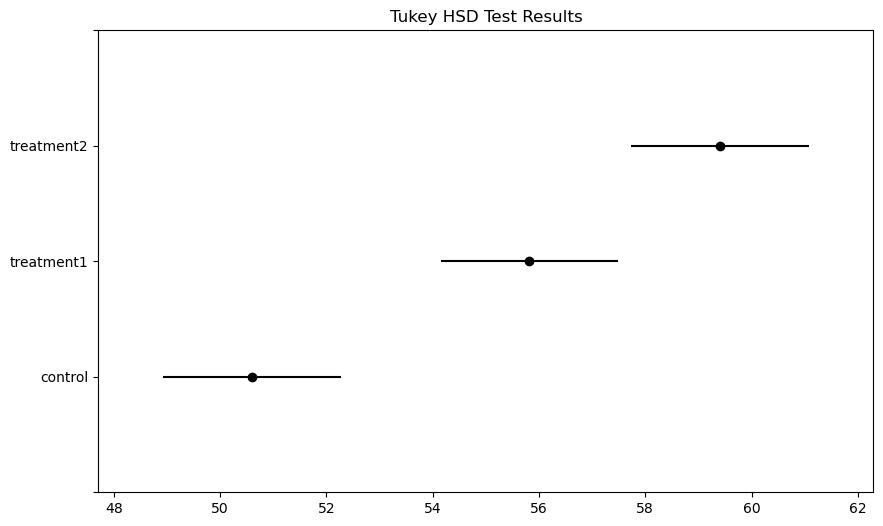

In [7]:
plt.figure(figsize=(6, 4))
tukey.plot_simultaneous()
plt.title('Tukey HSD Test Results')
plt.show()


#### Compute effect sizes

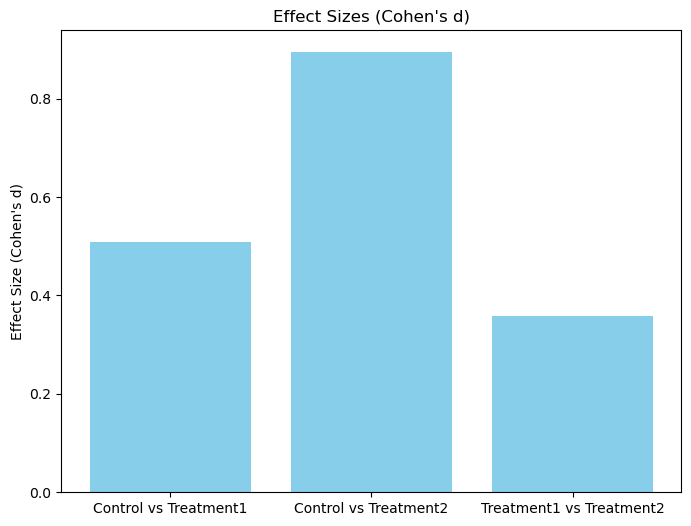

In [8]:
effect_size_control_vs_treatment1 = compute_effect_size(
    df[df['group'] == 'control']['performance'],
    df[df['group'] == 'treatment1']['performance']
)

effect_size_control_vs_treatment2 = compute_effect_size(
    df[df['group'] == 'control']['performance'],
    df[df['group'] == 'treatment2']['performance']
)

effect_size_treatment1_vs_treatment2 = compute_effect_size(
    df[df['group'] == 'treatment1']['performance'],
    df[df['group'] == 'treatment2']['performance']
)

# Plot effect sizes
effect_sizes = {
    'Control vs Treatment1': effect_size_control_vs_treatment1,
    'Control vs Treatment2': effect_size_control_vs_treatment2,
    'Treatment1 vs Treatment2': effect_size_treatment1_vs_treatment2
}

plt.figure(figsize=(8, 6))
plt.bar(effect_sizes.keys(), effect_sizes.values(), color='skyblue')
plt.title('Effect Sizes (Cohen\'s d)')
plt.ylabel('Effect Size (Cohen\'s d)')
plt.show()
